<h1> Name: Shreya Dharmadhikari </h1>

<h1> The Sparks Foundation- GRIPJUNE21 </h1>
<h1> Data Science And Business Analytics Intern at The Sparks Foundation </h1>

<h1> Task 2: Prediction using Unsupervised ML </h1>

<h2> Problem Statement: From the given ‘Iris’ dataset, predict the optimum number of clusters 
and represent it visually. </h2>

<h2> Code: </h2>

In [96]:
# import the required libraries into the notebook.
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [97]:
# Load the Iris dataset.
iris=pd.read_csv(r"C:\Iris.csv")

In [98]:
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<h3> Understanding and Exploring the dataset. </h3>

In [99]:
#display first 10 records from the dataset.
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [100]:
# Display all the columns in the iris dataset
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [101]:
# info() method gives information like no of rows and columns in the dataset along with their datatypes and memory usage.
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [102]:
# describe() is used for statistical details about the data in a dataset.
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [103]:
# isnull() is used to check if there are any null values present in the dataset.
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<h4> Thus, no null values present </h4>

In [104]:
#value_counts() is used to give count of unique values in dataset
iris['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [105]:
iris.size

900

In [106]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
species = encoder.fit_transform(iris['Species'])
species

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [107]:
x=iris.drop(['Id','Species'],axis=1)
x.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<h2> Applying the K-means clustering </h2>

<h4> K-means Clustering: K-means clustering is an unsupervised machine learning algorithm.The objective of K-means is: group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.</h4>

<h4> Cluster:A cluster refers to a collection of data points aggregated together because of certain similarities.</h4>

<h4> What is k? - k refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.</h4>

<h4>Elbow Method: Elbow Method is used for finding the optimal value of k. </h4>

<h3> Finding out the value of k by using Elbow method </h3>

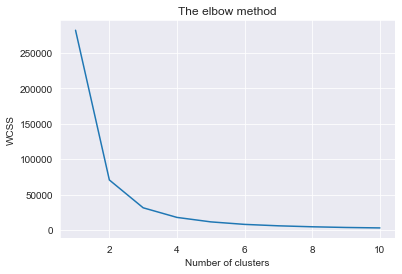

In [108]:
# Finding the optimum number of clusters for k-means classification
# Using the elbow method to find  the optimal number of clusters

x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

<h3> From the above graph, it is clear that the elbow is forming at k=3. Thus, the optimal value of Number of clusters is 3.</h3>

In [109]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

<h2>Visualization of clusters</h2>

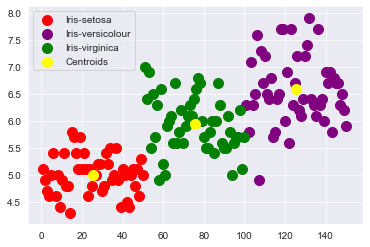

In [110]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

<h2>Evaluation Of Model</h2>

In [111]:
# Find the Silhouette Coefficient to determine the efficiency of K-means clustering model.

from sklearn.metrics.cluster import silhouette_score

silhouette_score(x, y_kmeans, metric = 'euclidean')

0.5820898597618552

<h2> Conclusion: </h2>
<h3> 1. Thus, optimum number of clusters were determined by applying the K-means clusturing algorithm using the elbow method. </h3>
<h3> 2. The optimum number of clusters obtained are 3 (i.e k=3). And these clusters were represented graphically.</h3>
       
<h3> 3. Silhouette score of the model is 0.5820 which indicates that the clusters are nicely separated. Thus, our model is having high accuracy.
    </h3>